In [1]:
#import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
#clean data
wine_dataframe=pd.read_csv("Resources/wine_dataset.csv")
wine_dataframe_clean=wine_dataframe.drop(["Unnamed: 0","region_2", "description","designation"], axis=1)
wine_dataframe_clean

,country,points,price,province,region_1,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


In [3]:
clean_wine_data=wine_dataframe_clean.dropna()
clean_wine_data

,country,points,price,province,region_1,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


<IPython.core.display.Javascript object>


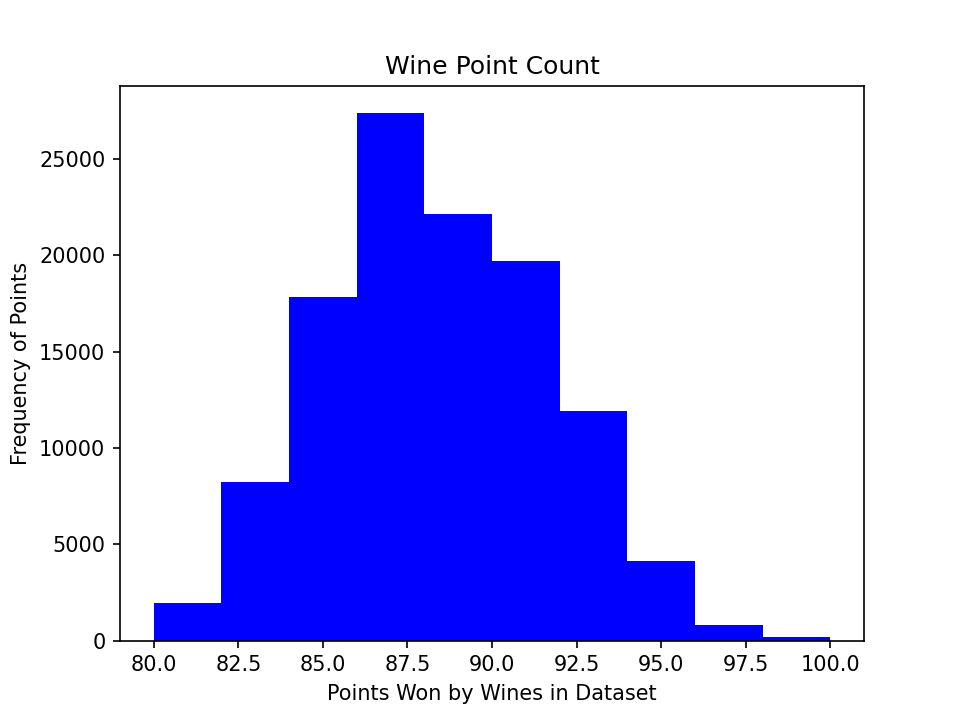

Text(0, 0.5, 'Frequency of Points')

In [4]:
#points breakdown overall histogram
points_count=clean_wine_data["points"].value_counts().tolist()
points_labels=clean_wine_data["points"].unique()
points_labels
points_count

#chart for point breakdown overall
plt.hist(clean_wine_data.points, color='b')

plt.title("Wine Point Count")
plt.xlabel("Points Won by Wines in Dataset")
plt.ylabel("Frequency of Points")

In [5]:
#summary statistics for points
summary_stat_points=clean_wine_data["points"].describe()
summary_stat_points

count    114393.000000
mean         87.855061
std           3.284661
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [7]:
#boxplot to display outliers and how point breakdown compares to the different countries

country_count=clean_wine_data["country"].value_counts()
country_labels=clean_wine_data["country"].unique()
country_list=country_labels.tolist()

country_list

point_list=[]

for country in country_list:
    
    points_final= clean_wine_data.loc[clean_wine_data["country"]==country,"points"]
    point_list.append(points_final)
    
    quartiles = points_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = points_final.loc[( points_final < lower_bound) | (points_final > upper_bound)]
    print(f"{country}'s potential outliers: {outliers}")

US's potential outliers: 2149       98
10006      98
14571      98
19354     100
19356      99
         ... 
142697     98
143522    100
143523     99
143524     98
143525     98
Name: points, Length: 76, dtype: int64
Spain's potential outliers: 6005      97
10538     98
10595     97
23766     97
53907     97
68239     97
70169     97
90441     97
94649     97
113029    97
130889    97
135709    97
140176    98
Name: points, dtype: int64
France's potential outliers: 2145      100
26296     100
26297      99
34920      99
51886     100
51887      99
68237      99
83536     100
83537      99
113027     99
135707     99
Name: points, dtype: int64
Italy's potential outliers: 10        95
2146      99
2147      98
2150      97
2449      96
          ..
150543    82
150549    82
150552    82
150556    81
150557    81
Name: points, Length: 501, dtype: int64
Argentina's potential outliers: 10619     95
10879     95
22117     95
63764     96
63766     96
65331     97
65474     95
65476     95
8

<IPython.core.display.Javascript object>


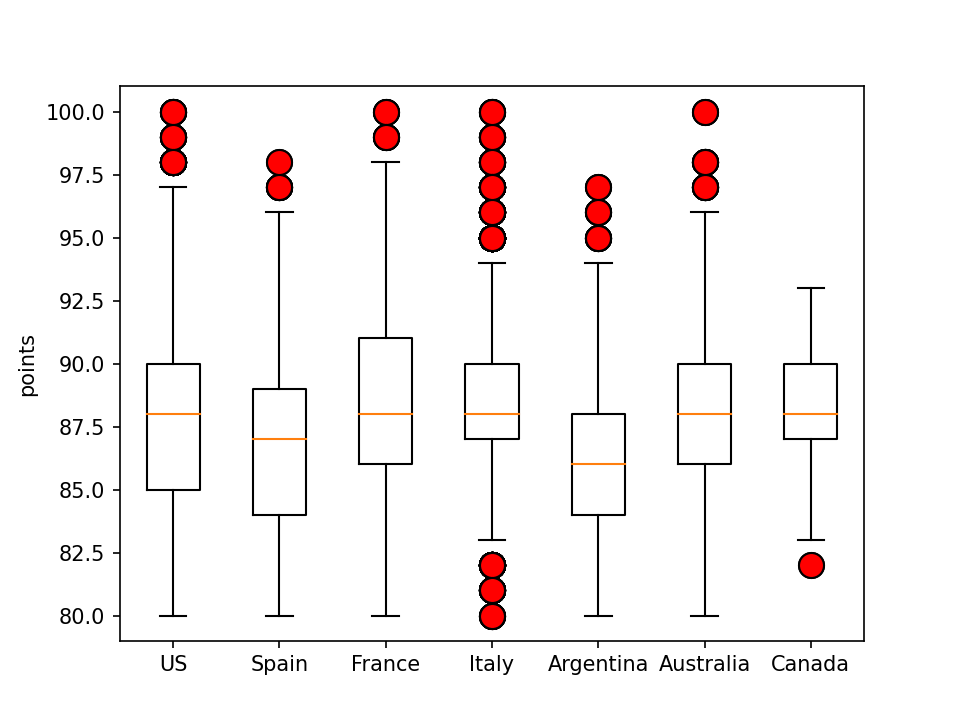

In [9]:
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(point_list, labels = country_list,flierprops=orange_out)
plt.ylabel('points')
plt.show()

In [27]:
#wine with most points by (what winery it comes from, what variety and what country)
winepoint_max=(clean_wine_data.points).idxmax()
wine_var_pop=clean_wine_data.loc[winepoint_max,'variety']
wine_var_pop
wine_country_pop=clean_wine_data.loc[winepoint_max,'country']
wine_country_pop
wine_winery_pop=clean_wine_data.loc[winepoint_max,'winery']
wine_winery_pop


'ChÃ¢teau Haut-Brion'

In [28]:
#wine highest price (what winery it comes from, what variety and what country)
wine_price_max=(clean_wine_data.price).idxmax()
wine_var_price=clean_wine_data.loc[wine_price_max,'variety']
wine_var_price
wine_country_price=clean_wine_data.loc[wine_price_max,'country']
wine_country_price
wine_winery_price=clean_wine_data.loc[wine_price_max,'winery']
wine_winery_price

'ChÃ¢teau Latour'

In [35]:
#wine with lowest points
winepoint_min=(clean_wine_data.points).idxmin()
wine_var_popmin=clean_wine_data.loc[winepoint_min,'variety']
wine_var_popmin
wine_country_popmin=clean_wine_data.loc[winepoint_min,'country']
wine_country_popmin
wine_winery_popmin=clean_wine_data.loc[winepoint_min,'winery']
wine_winery_popmin


'Chardonnay'

In [32]:
#cheapest wine
wine_price_min=(clean_wine_data.price).idxmin()
wine_var_pricemin=clean_wine_data.loc[wine_price_min,'variety']
wine_var_pricemin
wine_country_pricemin=clean_wine_data.loc[wine_price_min,'country']
wine_country_pricemin
wine_winery_pricemin=clean_wine_data.loc[wine_price_min,'winery']
wine_winery_pricemin


'Chardonnay'

In [10]:
#number of varieties in the dataset
variety_count=clean_wine_data["variety"].value_counts().tolist()
variety_labels=clean_wine_data["variety"].unique()
variety_num=len(variety_labels)
variety_num


460

In [ ]:
#most popular variety or varieties most popular winery 


In [ ]:
#cheapest wine and lowest points

In [12]:
#number of wineries in the dataset
winery_count=clean_wine_data[["country","winery"]].value_counts()
winery_labels=clean_wine_data["winery"].unique()

number_winery=len(winery_labels)
number_winery

11859

In [13]:
#most popular wineries
winery_count=clean_wine_data[["country","winery"]].value_counts()
winery_labels=clean_wine_data["winery"].unique()
winery_count


country  winery                     
US       Williams Selyem                371
         Testarossa                     274
         Chateau Ste. Michelle          225
         Columbia Crest                 216
         Kendall-Jackson                216
                                       ... 
         Clendenen Family                 1
France   ChÃ¢teau Moulin de Vignolle      1
         ChÃ¢teau Moulin de Mallet        1
US       Clendenen                        1
France   ChÃ¢teau Bois Redon              1
Length: 11941, dtype: int64

In [ ]:
#winery count by country  
winery_count=clean_wine_data[["country","winery"]].value_counts()
winery_labels=clean_wine_data["winery"].unique()
winery_count


In [ ]:
#what wineries produce what varieties and the average score and price of the wine variety
winery_variety=clean_wine_data.groupby(["winery","variety"]).mean()
winery_variety

In [ ]:
#variett count by winery
variety_count_by_winery=clean_wine_data[["winery","variety"]].value_counts()
variety_count_by_winery

In [ ]:
#chart displaying what countries have the most wines in the dataset

country_count=clean_wine_data["country"].value_counts()
country_labels=clean_wine_data["country"].unique()


#chart displaying what countries have the most wines in the dataset
plt.bar(country_labels,country_count, color='b')
plt.title("Country Count for Wine in Dataset")
plt.xlabel("Countries the Wines are from")
plt.ylabel("Country Frequency")


In [ ]:
#sort by country and then point break down and determine the percentage of wines that score well for each of the countries
usa_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="US")]
point_breakdown_usa=usa_country_count["points"].value_counts().tolist()

spain_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Spain")]
point_breakdown_spain=spain_country_count["points"].value_counts().tolist()

france_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="France")]
point_breakdown_france=france_country_count["points"].value_counts().tolist()

italy_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Italy")]
point_breakdown_italy=italy_country_count["points"].value_counts().tolist()


In [ ]:
argentina_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")]

argpie=argentina_country_count.points.value_counts()
argpie.plot(kind="pie",autopct='%1.1f%%')
plt.show()

#consider doing plot in pyplot?


In [ ]:
#problem with canada doesnt makes sense the point breakdown 
canada_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Canada")]
point_breakdown_canada=canada_country_count["points"].value_counts().tolist()


In [ ]:
australia_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Australia")]
point_breakdown_australia=australia_country_count["points"].value_counts().tolist()


In [ ]:
#summary statistics for price
summary_stat_price=clean_wine_data["price"].describe()
summary_stat_price

In [ ]:
filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=93) & (clean_wine_data["points"]<=96)]
country_filter=filter_df["country"].value_counts()
country_filter
# summary=filter_df.groupby(["points"])

In [ ]:
#original count
count_us=len(clean_wine_data.loc[(clean_wine_data["country"]=="US")])
count_italy=len(clean_wine_data.loc[(clean_wine_data["country"]=="Italy")])
count_spain=len(clean_wine_data.loc[(clean_wine_data["country"]=="Spain")])
count_france=len(clean_wine_data.loc[(clean_wine_data["country"]=="France")])
count_argentina=len(clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")])
count_canada=len(clean_wine_data.loc[(clean_wine_data["country"]=="Canada")])
count_australia=len(clean_wine_data.loc[(clean_wine_data["country"]=="Australia")])


In [ ]:
#count for 93-96
count_us_filter=len(filter_df.loc[(filter_df["country"]=="US")])
count_italy_filter=len(filter_df.loc[(filter_df["country"]=="Italy")])
count_spain_filter=len(filter_df.loc[(filter_df["country"]=="Spain")])
count_france_filter=len(filter_df.loc[(filter_df["country"]=="France")])
count_argentina_filter=len(filter_df.loc[(filter_df["country"]=="Argentina")])
count_canada_filter=len(filter_df.loc[(filter_df["country"]=="Canada")])
count_australia_filter=len(filter_df.loc[(filter_df["country"]=="Australia")])


In [ ]:
#percent of wines from the countries that scored between 93 and 96

In [ ]:
usa_percent=(count_us_filter/count_us)*100
usa_percent

In [ ]:
italy_percent=(count_italy_filter/count_italy)*100
italy_percent

In [ ]:
spain_percent=(count_spain_filter/count_spain)*100
spain_percent

In [ ]:
france_percent=(count_france_filter/count_france)*100
france_percent

In [ ]:
argentina_percent=(count_argentina_filter/count_argentina)*100
argentina_percent

In [ ]:
canada_percent=(count_canada_filter/count_canada)*100
canada_percent

In [ ]:
australia_percent=(count_australia_filter/count_australia)*100
australia_percent

In [ ]:
#wines with scores higher than 88 points from each country
greater_than_average=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_than_average

In [ ]:
#finding percentage which countries that have wineries with above average wine
greater_count_us=len(greater_than_average.loc[(greater_than_average["country"]=="US")])
greater_count_italy=len(greater_than_average.loc[(greater_than_average["country"]=="Italy")])
greater_count_spain=len(greater_than_average.loc[(greater_than_average["country"]=="Spain")])
greater_count_france=len(greater_than_average.loc[(greater_than_average["country"]=="France")])
greater_count_argentina=len(greater_than_average.loc[(greater_than_average["country"]=="Argentina")])
greater_count_canada=len(greater_than_average.loc[(greater_than_average["country"]=="Canada")])
greater_count_australia=len(greater_than_average.loc[(greater_than_average["country"]=="Australia")])


In [ ]:
#finding percentage with wineries below average 
#wines with scores lower than 88 points
less_than_average=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
less_than_average

In [ ]:
#prices of wine with points above average points
# price_greater_than=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
# greater_price_count=price_greater_than["price"].value_counts()
# greater_price_count

In [ ]:
#determining correlation of points and price 
wine_correlation=clean_wine_data.corr()
wine_correlation


In [ ]:
#finding prices of wines below average 
# price_less_than=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
# points_prices=price_less_than["price"].value_counts()


In [ ]:
#seperate (filterby) the wines that come from the USA and then breakdown by province 
us_wines=clean_wine_data[clean_wine_data.country=="US"]
us_wine_provinces_count=us_wines["province"].value_counts().tolist()
us_wine_provinces_labels=us_wines["province"].unique()

# chart to show most popular province in the US for wine. BAR CHART?
# plt.bar(country_labels,country_count, color='b')
# plt.title("Country Count for Wine in Dataset")
# plt.xlabel("Countries the Wines are from")
# plt.ylabel("Country Frequency")

In [ ]:
#breakdown by region of California
california_wine=clean_wine_data[clean_wine_data.province=="California"]
cali_region_wine_count=california_wine["region_1"].value_counts().tolist()
cali_region_wine_labels=california_wine["region_1"].unique()
cali_region_len=len(cali_region_wine_labels)
cali_region_len
#chart or graph

In [ ]:
#scatter plot of the price by point value
plt.scatter(clean_wine_data.iloc[:,2],clean_wine_data.iloc[:,3])
plt.xlabel("points")
plt.ylabel("price")
plt.show()

In [ ]:
#grouping the wines by variety and determining the average price and points for that variety 
price_filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=93) & (clean_wine_data["points"]<=96)]
variety_grouped_price_points=price_filter_df.groupby(["variety"]).mean()
variety_grouped_price_points

In [ ]:
#average price and points of wine per country
country_grouped_price_points=clean_wine_data.groupby(["country"]).mean()
country_grouped_price_points

In [ ]:
#Average points and price per variety in each country
grouped_country_variety_price_point=clean_wine_data.groupby(["country","variety"]).mean()
grouped_country_variety_price_point